In [15]:
import pandas as pd
from sqlalchemy import create_engine
import os
import json
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def load_credentials(path = "aws_rds_credentials.json"):
     with open(path, 'r') as file:
          config = json.load(file)

     # set up credentials
     for key in config.keys():
          os.environ[key] = config[key]

     return

time_interval = 90 #days

load_credentials()

aws_rds_url = f"postgresql://{os.environ['user']}:{os.environ['password']}@{os.environ['host']}:{os.environ['port']}/{os.environ['database']}?sslmode=require"

engine = create_engine(aws_rds_url)
sql_query = f"""SELECT *
               FROM public.tracking_staging 
               """
data = pd.read_sql(sql_query, engine)
data

,product_id,catalog_id,brand_title,date,size_title,color1_id,favourite_count,view_count,created_at,original_price_numeric,price_numeric,package_size_id,service_fee,city,country,color1,status,description,item_closing_action,user_id
0,1277285766,1041.0,Shein,2024-03-12,M / 38 / 10,24.0,1.0,12.0,2021-08-26,5.0,5.0,1.0,0.95,Lattes,France,Rosa,Novo sem etiquetas,"joli haut rose, correspond à sa taille, matièr...",None,18995674.0
1,869485370,1908.0,Cindy-H,2024-03-12,M / 38 / 10,1.0,0.0,19.0,2021-01-27,17.0,14.0,1.0,1.40,Lattes,France,Preto,Muito bom,en parfait état et porte très chaud ☺️,None,18995674.0
2,850960252,1908.0,Cindy-H,2024-03-12,M / 38 / 10,2.0,2.0,35.0,2021-01-17,32.0,15.0,1.0,1.45,Lattes,France,Castanho,Muito bom,magnifique doudoune avec fourrure brune sur le...,None,18995674.0
3,779639651,1730.0,Littlest Pet Shop,2024-03-12,Tamanho único,None,2.0,42.0,2020-12-03,5.0,5.0,1.0,0.95,Lattes,France,None,Muito bom,"différent modèle mélangé, pleins de petits acc...",None,18995674.0
4,593769817,11.0,Lefties,2024-03-12,M / 38 / 10,9.0,0.0,12.0,2020-08-31,6.0,6.0,1.0,1.00,Lattes,France,Azul,Muito bom,jupe moulante en jean,None,18995674.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427804,1287088133,222.0,Vintage,2024-03-12,L / 40 / 12,8.0,6.0,27.0,2021-08-31,9.0,9.0,1.0,1.15,Lattes,France,Amarelo,Muito bom,elle est de couleur bleue marine et à encore d...,None,18995674.0
427805,1277346100,1042.0,Shein,2024-03-12,M / 38 / 10,26.0,6.0,29.0,2021-08-26,8.0,8.0,1.0,1.10,Lattes,France,Azul claro,Muito bom,magnifique haut crop top avec dos à découvert,None,18995674.0
427806,1277343135,1842.0,Stradivarius,2024-03-12,L / 40 / 12,9.0,0.0,53.0,2021-08-26,9.0,9.0,1.0,1.15,Lattes,France,Azul,Muito bom,Il est en bon état si ce n’est l’étiquette de ...,None,18995674.0
427807,1277341404,1065.0,Shein,2024-03-12,M / 38 / 10,26.0,2.0,26.0,2021-08-26,8.0,4.0,1.0,0.90,Lattes,France,Azul claro,Bom,petite robe bleue ciel \n\nElle est en bonne é...,None,18995674.0


In [ ]:
benchmark = data.groupby(["catalog_id"]).agg(["count", "sum", "median", "std"]).reset_index()
benchmark

In [12]:
data = data[data["brand_title"] == "Ralph Lauren"]
agg_data = data.groupby(["catalog_id"])["price_numeric"].agg(["count", "sum", "median", "std"]).reset_index()
agg_data

,catalog_id,count,sum,median,std
0,16,9,825,100.0,25.000000
1,18,3,60,20.0,0.000000
2,84,15,250,18.0,3.518658
3,87,3,75,25.0,0.000000
4,89,2,60,30.0,7.071068
...,...,...,...,...,...
96,2661,50,5532,149.0,59.408225
97,2662,48,7152,149.0,0.000000
98,2751,1,20,20.0,NaN
99,2953,5,210,40.0,2.738613


Text(0.5, 0.92, '3D Scatter Plot of Median, Standard Deviation, and Count per Catalog ID')

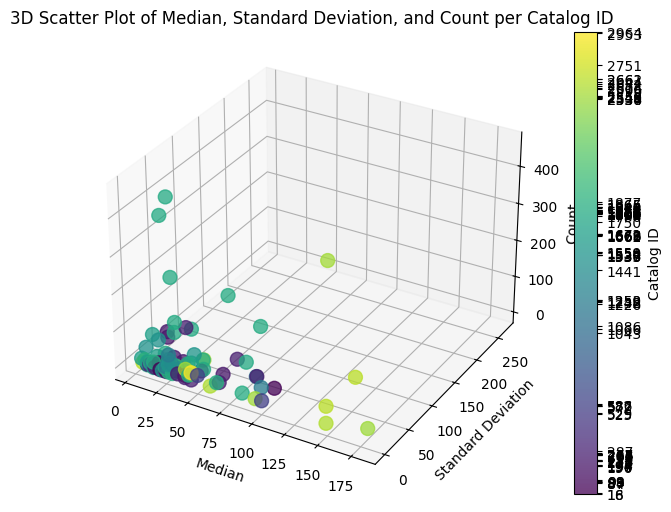

In [14]:
# Create scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(agg_data["median"], agg_data["std"], agg_data["count"], c=agg_data["catalog_id"], cmap='viridis', s=100, alpha=0.75)

# Add color bar
cbar = plt.colorbar(scatter, label='Catalog ID')
cbar.set_ticks(sorted(agg_data["catalog_id"]))

# Set labels and title
ax.set_xlabel('Median')
ax.set_ylabel('Standard Deviation')
ax.set_zlabel('Count')
ax.set_title('3D Scatter Plot of Median, Standard Deviation, and Count per Catalog ID')
